In [4]:
# Los resultados del SIMCE difieren signitificativamente dependiendo de la comuna?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('future.no_silent_downcasting', True)

In [5]:
# cursos
cuarto2014 = "data/2014/simce4b2014_rbd_publica_final.xlsx"
cuarto2016 = "data/2016/simce4b2016_rbd_publica_final.xlsx"
sexto2016 = "data/2016/simce6b2016_rbd_publica_final.xlsx"
octavo2019 = 'data/2019/simce8b2019_rbd.xlsx'
segundo2022 = "data/2022/Simce2m2022_rbd_final.xlsx"
cuarto2022 = "data/2022/Simce4b2022_rbd_final.xlsx"

In [6]:
# se guardan los excel en df

df14 = pd.read_excel(cuarto2014)
df14 = df14[['nom_rbd','cod_grupo','cod_rural_rbd','nom_reg_rbd','nom_com_rbd','nom_pro_rbd','cod_depe2', 'prom_lect4b_rbd', 'prom_mate4b_rbd']]

df16_4 = pd.read_excel(cuarto2016)
df16_4 = df16_4[['nom_rbd', 'cod_grupo','cod_rural_rbd','nom_reg_rbd','nom_com_rbd','nom_pro_rbd','cod_depe2', 'prom_lect4b_rbd', 'prom_mate4b_rbd']]

df16_6 = pd.read_excel(sexto2016)
df16_6 = df16_6[['nom_rbd','agno', 'cod_grupo','cod_rural_rbd','nom_reg_rbd','nom_com_rbd','nom_pro_rbd','cod_depe2', 'prom_lect6b_rbd', 'prom_mate6b_rbd']]

df19 = pd.read_excel(octavo2019)
df19 = df19[['nom_rbd', 'agno','cod_grupo', 'cod_rural_rbd','nom_reg_rbd','nom_com_rbd','nom_pro_rbd','cod_depe2', 'prom_lect8b_rbd', 'prom_mate8b_rbd']]

df22_4 = pd.read_excel(cuarto2022)
df22_4 = df22_4[['nom_rbd','agno','cod_grupo','cod_rural_rbd','nom_reg_rbd','nom_com_rbd','nom_pro_rbd','cod_depe2', 'prom_lect4b_rbd', 'prom_mate4b_rbd']]

df22_2 = pd.read_excel(segundo2022)
df22_2 = df22_2[['nom_rbd','agno','cod_grupo','cod_rural_rbd','nom_reg_rbd','nom_com_rbd','nom_pro_rbd','cod_depe2', 'prom_lect2m_rbd', 'prom_mate2m_rbd']]

In [7]:
# se agrupan los excel en nombre region y nombre comuna ademas de calcular el promedio por columna y su desviacion estandar

df14_mean = df14.groupby(['nom_reg_rbd', 'nom_com_rbd'])[['prom_lect4b_rbd', 'prom_mate4b_rbd']].mean().reset_index()
df14_mean.columns = ['nom_reg_rbd', 'nom_com_rbd', 'prom_lect4b_rbd','prom_mate4b_rbd']
df14_mean['prom_lect4b_rbd'], df14_mean['prom_mate4b_rbd'] = round(df14_mean['prom_lect4b_rbd'], 2), round(df14_mean['prom_mate4b_rbd'], 2)

df16_mean_6 = df16_6.groupby(['nom_reg_rbd', 'nom_com_rbd'])[['prom_lect6b_rbd', 'prom_mate6b_rbd']].mean().reset_index()
df16_mean_6.columns = ['nom_reg_rbd', 'nom_com_rbd', 'prom_lect6b_rbd','prom_mate6b_rbd']
df16_mean_6['prom_lect6b_rbd'], df16_mean_6['prom_mate6b_rbd'] = round(df16_mean_6['prom_lect6b_rbd'], 2), round(df16_mean_6['prom_mate6b_rbd'], 2)

df16_mean_4 = df16_4.groupby(['nom_reg_rbd', 'nom_com_rbd'])[['prom_lect4b_rbd', 'prom_mate4b_rbd']].mean().reset_index()
df16_mean_4.columns = ['nom_reg_rbd', 'nom_com_rbd', 'prom_lect4b_rbd','prom_mate4b_rbd']
df16_mean_4['prom_lect4b_rbd'], df16_mean_4['prom_mate4b_rbd'] = round(df16_mean_4['prom_lect4b_rbd'], 2), round(df16_mean_4['prom_mate4b_rbd'], 2)

df19_mean = df19.groupby(['nom_reg_rbd', 'nom_com_rbd'])[['prom_lect8b_rbd', 'prom_mate8b_rbd']].mean().reset_index()
df19_mean.columns = ['nom_reg_rbd', 'nom_com_rbd', 'prom_lect8b_rbd', 'prom_mate8b_rbd']
df19_mean['prom_lect8b_rbd'], df19_mean['prom_mate8b_rbd'] = round(df19_mean['prom_lect8b_rbd'], 2), round(df19_mean['prom_mate8b_rbd'], 2)

df22_mean_4 = df22_4.groupby(['nom_reg_rbd', 'nom_com_rbd'])[['prom_lect4b_rbd', 'prom_mate4b_rbd']].mean().reset_index()
df22_mean_4.columns = ['nom_reg_rbd', 'nom_com_rbd', 'prom_lect4b_rbd','prom_mate4b_rbd']
df22_mean_4['prom_lect4b_rbd'], df22_mean_4['prom_mate4b_rbd'] = round(df22_mean_4['prom_lect4b_rbd'], 2), round(df22_mean_4['prom_mate4b_rbd'], 2)

df22_mean_2 = df22_2.groupby(['nom_reg_rbd', 'nom_com_rbd'])[['prom_lect2m_rbd', 'prom_mate2m_rbd']].mean().reset_index()
df22_mean_2.columns = ['nom_reg_rbd', 'nom_com_rbd', 'prom_lect2m_rbd','prom_mate2m_rbd']
df22_mean_2['prom_lect2m_rbd'], df22_mean_2['prom_mate2m_rbd'] = round(df22_mean_2['prom_lect2m_rbd'], 2), round(df22_mean_2['prom_mate2m_rbd'], 2)


In [8]:
# obtenemos el promedio en las dos pruebas y se eliminan los que no tienen promedios
df14_mean['prom_mate_leng'] = (df14_mean['prom_lect4b_rbd'] + df14_mean['prom_mate4b_rbd'])/2
df14_mean = df14_mean.dropna(subset=['prom_mate_leng'])
df14_mean = df14_mean[df14_mean['prom_mate_leng'] != 0]
df14_mean['curso'] = '4b'

df16_mean_6['prom_mate_leng'] = (df16_mean_6['prom_lect6b_rbd'] + df16_mean_6['prom_mate6b_rbd'])/2
df16_mean_6 = df16_mean_6.dropna(subset=['prom_mate_leng'])
df16_mean_6 = df16_mean_6[df16_mean_6['prom_mate_leng'] != 0]
df16_mean_6['curso'] = '6b'

df16_mean_4['prom_mate_leng'] = (df16_mean_4['prom_lect4b_rbd'] + df16_mean_4['prom_mate4b_rbd'])/2
df16_mean_4 = df16_mean_4.dropna(subset=['prom_mate_leng'])
df16_mean_4 = df16_mean_4[df16_mean_4['prom_mate_leng'] != 0]
df16_mean_4['curso'] = '4b'

df19_mean['prom_mate_leng'] = (df19_mean['prom_lect8b_rbd'] + df19_mean['prom_mate8b_rbd'])/2
df19_mean = df19_mean.dropna(subset=['prom_mate_leng'])
df19_mean = df19_mean[df19_mean['prom_mate_leng'] != 0]
df19_mean['curso'] = '8b'

df22_mean_2['prom_mate_leng'] = (df22_mean_2['prom_lect2m_rbd'] + df22_mean_2['prom_mate2m_rbd'])/2
df22_mean_2 = df22_mean_2.dropna(subset=['prom_mate_leng'])
df22_mean_2 = df22_mean_2[df22_mean_2['prom_mate_leng'] != 0]
df22_mean_2['curso'] = '2m'

df22_mean_4['prom_mate_leng'] = (df22_mean_4['prom_lect4b_rbd'] + df22_mean_4['prom_mate4b_rbd'])/2
df22_mean_4 = df22_mean_4.dropna(subset=['prom_mate_leng'])
df22_mean_4 = df22_mean_4[df22_mean_4['prom_mate_leng'] != 0]
df22_mean_4['curso'] = '4b'

# obtenemos la mejor y peor comuna en las dos pruebas en conjunto de cada año
df14_ordenado = df14_mean.sort_values(by='prom_mate_leng', ascending=False)
df14_comunas = pd.concat([df14_ordenado.head(2), df14_ordenado.tail(2)], ignore_index=True)
df14_comunas['year'] = 2014

df16_ordenado_6 = df16_mean_6.sort_values(by='prom_mate_leng', ascending=False)
df16_comunas_6 = pd.concat([df16_ordenado_6.head(2), df16_ordenado_6.tail(2)], ignore_index=True)
df16_comunas_6['year'] = 2016

df16_ordenado_4 = df16_mean_4.sort_values(by='prom_mate_leng', ascending=False)
df16_comunas_4 = pd.concat([df16_ordenado_4.head(2), df16_ordenado_4.tail(2)], ignore_index=True)
df16_comunas_4['year'] = 2016

df19_ordenado = df19_mean.sort_values(by='prom_mate_leng', ascending=False)
df19_comunas = pd.concat([df19_ordenado.head(2), df19_ordenado.tail(2)], ignore_index=True)
df19_comunas['year'] = 2019

df19_comunas.loc[df19_comunas['nom_com_rbd'] == 'VITAC', 'nom_com_rbd'] = 'VITACURA'
df19_comunas.loc[df19_comunas['nom_com_rbd'] == 'O\'HIG', 'nom_com_rbd'] = 'O\'HIGGINS'
df19_comunas.loc[df19_comunas['nom_com_rbd'] == 'GENER', 'nom_com_rbd'] = 'GENERAL LAGOS'
df19_comunas.loc[df19_comunas['nom_com_rbd'] == 'CAMAR', 'nom_com_rbd'] = 'CAMARONES'

df22_ordenado_2 = df22_mean_2.sort_values(by='prom_mate_leng', ascending=False)
df22_comunas_2 = pd.concat([df22_ordenado_2.head(2), df22_ordenado_2.tail(2)], ignore_index=True)
df22_comunas_2['year'] = 2022

df22_ordenado_4 = df22_mean_4.sort_values(by='prom_mate_leng', ascending=False)
df22_comunas_4 = pd.concat([df22_ordenado_4.head(2), df22_ordenado_4.tail(2)], ignore_index=True)
df22_comunas_4['year'] = 2022

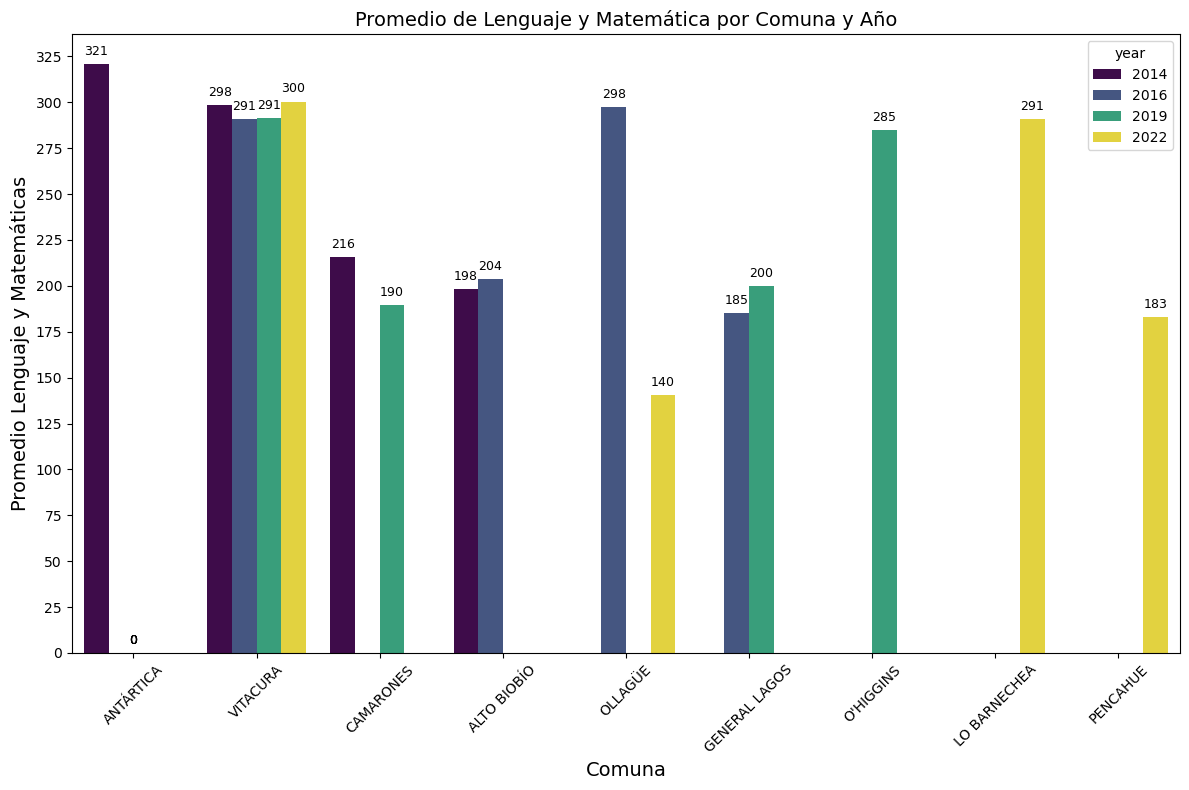

In [9]:
# se comparan distintos años y cursos
df_analisis = pd.concat([df14_comunas, df16_comunas_6, df19_comunas, df22_comunas_2], ignore_index=True)

plt.figure(figsize=(12, 8))

ax = sns.barplot(data=df_analisis, x='nom_com_rbd', y='prom_mate_leng', hue='year', palette='viridis')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,       
            p.get_height() + 5,                   
            f'{p.get_height():.0f}',              
            ha='center',
            fontsize=9)                           


plt.xlabel('Comuna', fontsize=14)
plt.ylabel('Promedio Lenguaje y Matemáticas', fontsize=14)
plt.title('Promedio de Lenguaje y Matemática por Comuna y Año', fontsize=14)

y_values = np.arange(0, 350, 25)  # Crear una secuencia de valores en el eje Y de 50 en 50
plt.yticks(y_values)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

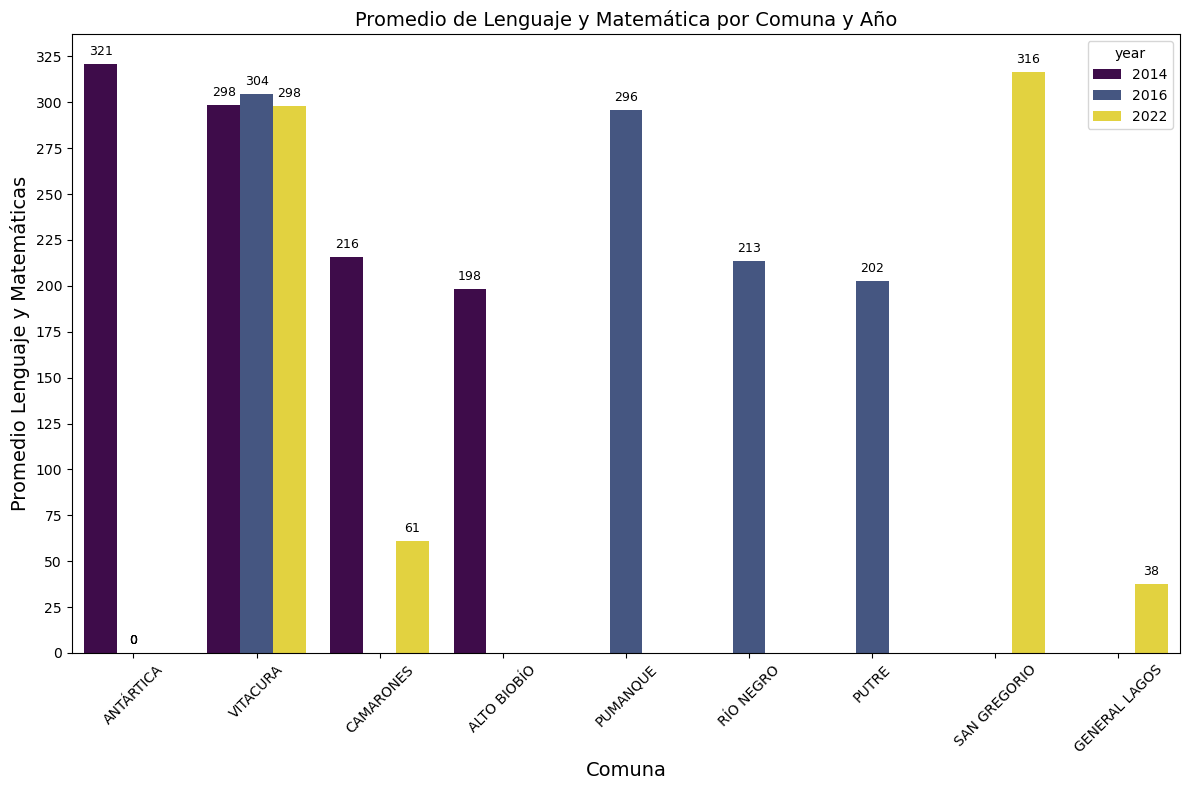

In [10]:
#
df_analisis = pd.concat([df14_comunas, df16_comunas_4, df22_comunas_4], ignore_index=True)

plt.figure(figsize=(12, 8))

ax = sns.barplot(data=df_analisis, x='nom_com_rbd', y='prom_mate_leng', hue='year', palette='viridis')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,       
            p.get_height() + 5,                   
            f'{p.get_height():.0f}',              
            ha='center',
            fontsize=9)                           


plt.xlabel('Comuna', fontsize=14)
plt.ylabel('Promedio Lenguaje y Matemáticas', fontsize=14)
plt.title('Promedio de Lenguaje y Matemática por Comuna y Año', fontsize=14)

y_values = np.arange(0, 350, 25)  # Crear una secuencia de valores en el eje Y de 50 en 50
plt.yticks(y_values)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

## Analisis(primer grafico)
El grafico anterior muestra las dos mejores y peores comunas en cuanto resultados del simce en matematicas y lenguaje por año, teniendo un total de 9 comunas. En 2014 se analiza un cuarto basico, en 2016 un sexto basico, en 2019 un octavo basico y en 2022 un segundo medio.

### Los resultados indican que:
1. Vitacura se encuentra en las comunas con mejores resultados en el simce en estos años.
2. La comuna de Antartica cuenta con los mejores resultados promedio en el año 2014.
3. Ollague tuvo el mejor resultado en 2016 pero en 2022 ademas se consagra como la comuna con peores resultados en los años estudiados.
4. Camarones, Alto Biobio y General Lagos cuentan como las peores comunas en dos años distintos.

## Conclusion:
Como conclusion podemos decir que si existe una diferencia significativa en los resultados SIMCE dependiendo de la comuna donde se realiza.

## Analisis(segundo grafico)
El grafico anterior muestra las dos mejores y peores comunas en cuanto resultados del simce en matematicas y lenguaje por año, teniendo un total de 9 comunas, donde en todos los años se analiza los cuartos basicos.

## Los resultados indican que:
Se comparte el punto 1, 2 y 4 con el primer grafico.

## Conclusion:
Podemos concluir que al analizar el mismo grado de educacion en distintos años comparte resultados con el grafico 1 en cuanto a las comunas con mejores y peores resultados promedio en las pruebas SIMCE.

In [26]:
# Afecta el grupo socioeconomico del establecimiento en el puntaje del simce?
# recibe un df con cod_grupo de tipo object y transforma a int
def estandarizar_cod_grupo(df):
    mapeo_grupos = {
    'Bajo': 1,
    'Medio bajo': 2,
    'Medio': 3,
    'Medio alto': 4,
    'Alto': 5 }
    df['cod_grupo'] = df['cod_grupo'].replace(mapeo_grupos)
    return df

In [32]:
# se agrupan los excel por codigo de grupo(nivel socioeconomico) y se calculan los promedios en las dos pruebas

df14_mean = df14.groupby('cod_grupo')[['prom_lect4b_rbd', 'prom_mate4b_rbd']].mean().reset_index()
df14_mean.columns = ['cod_grupo', 'prom_lect4b_rbd','prom_mate4b_rbd']
df14_mean = estandarizar_cod_grupo(df14_mean)
df14_mean['prom_lect'], df14_mean['prom_mate'] = round(df14_mean['prom_lect4b_rbd'], 2), round(df14_mean['prom_mate4b_rbd'], 2)
df14_mean['year'] = 2014

df16_mean_6 = df16_6.groupby('cod_grupo')[['prom_lect6b_rbd', 'prom_mate6b_rbd']].mean().reset_index()
df16_mean_6.columns = ['cod_grupo', 'prom_lect6b_rbd','prom_mate6b_rbd']
df16_mean_6 = estandarizar_cod_grupo(df16_mean_6)
df16_mean_6['prom_lect'], df16_mean_6['prom_mate'] = round(df16_mean_6['prom_lect6b_rbd'], 2), round(df16_mean_6['prom_mate6b_rbd'], 2)
df16_mean_6['year'] = 2016

df16_mean_4 = df16_4.groupby('cod_grupo')[['prom_lect4b_rbd', 'prom_mate4b_rbd']].mean().reset_index()
df16_mean_4.columns = ['cod_grupo', 'prom_lect4b_rbd','prom_mate4b_rbd']
df16_mean_4 = estandarizar_cod_grupo(df16_mean_4)
df16_mean_4['prom_lect'], df16_mean_4['prom_mate'] = round(df16_mean_4['prom_lect4b_rbd'], 2), round(df16_mean_4['prom_mate4b_rbd'], 2)
df16_mean_4['year'] = 2016

df19_mean = df19.groupby('cod_grupo')[['prom_lect8b_rbd', 'prom_mate8b_rbd']].mean().reset_index()
df19_mean.columns = ['cod_grupo', 'prom_lect8b_rbd', 'prom_mate8b_rbd']
df19_mean['prom_lect'], df19_mean['prom_mate'] = round(df19_mean['prom_lect8b_rbd'], 2), round(df19_mean['prom_mate8b_rbd'], 2)
df19_mean['year'] = 2019

df22_mean_2 = df22_2.groupby('cod_grupo')[['prom_lect2m_rbd', 'prom_mate2m_rbd']].mean().reset_index()
df22_mean_2.columns = ['cod_grupo', 'prom_lect2m_rbd','prom_mate2m_rbd']
df22_mean_2['prom_lect'], df22_mean_2['prom_mate'] = round(df22_mean_2['prom_lect2m_rbd'], 2), round(df22_mean_2['prom_mate2m_rbd'], 2)
df22_mean_2['year'] = 2022

df22_mean_4 = df22_4.groupby('cod_grupo')[['prom_lect4b_rbd', 'prom_mate4b_rbd']].mean().reset_index()
df22_mean_4.columns = ['cod_grupo', 'prom_lect4b_rbd','prom_mate4b_rbd']
df22_mean_4['prom_lect'], df22_mean_4['prom_mate'] = round(df22_mean_4['prom_lect4b_rbd'], 2), round(df22_mean_4['prom_mate4b_rbd'], 2)
df22_mean_4['year'] = 2022

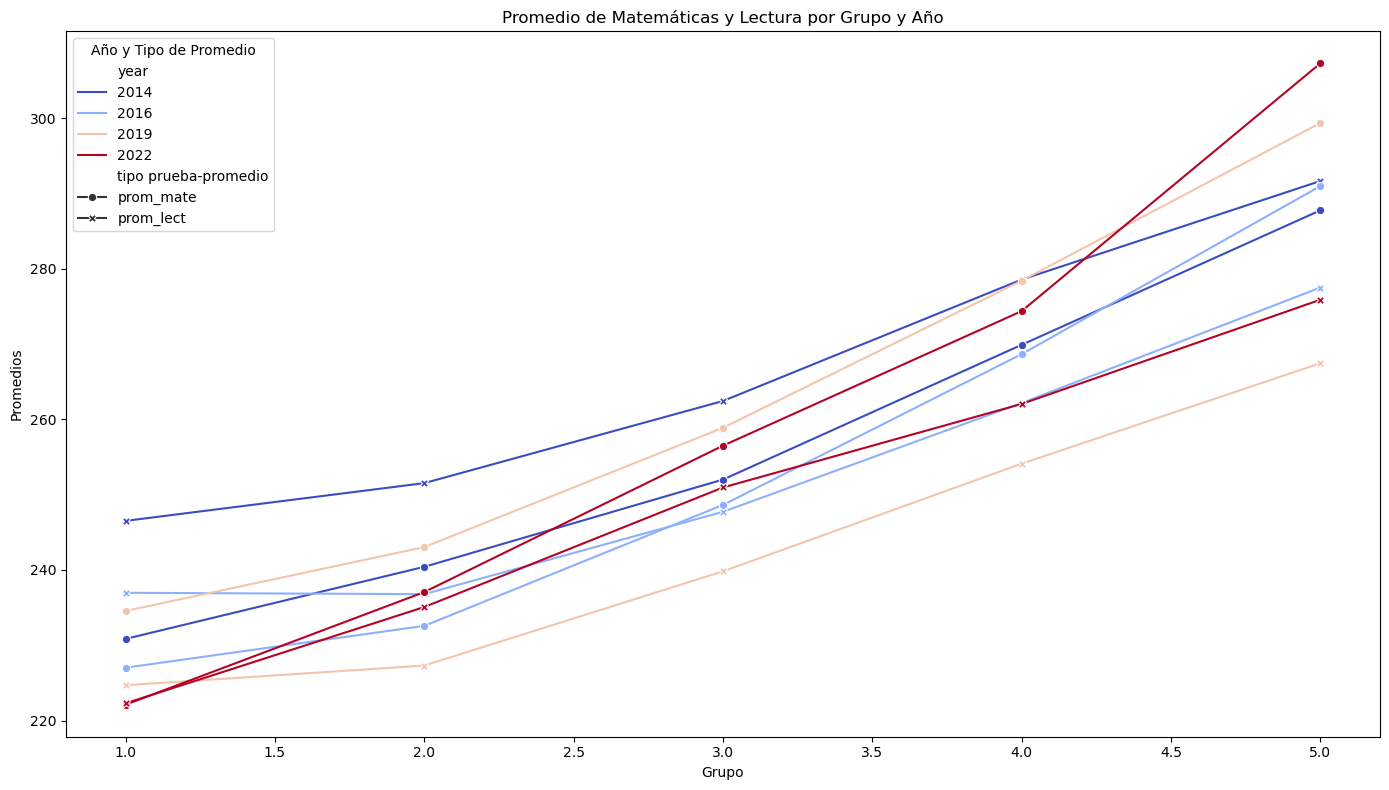

In [33]:
# se comparan distintos años y cursos
df_graf = pd.concat([df14_mean, df16_mean_6, df19_mean, df22_mean_2], ignore_index=True)

df_long = pd.melt(
    df_graf,
    id_vars=["cod_grupo", "year"],
    value_vars=["prom_mate", "prom_lect"],
    var_name="tipo prueba-promedio",
    value_name="promedio"
)

plt.figure(figsize=(14, 8))

sns.lineplot(
    data=df_long,
    x="cod_grupo",
    y="promedio",
    hue="year",
    style="tipo prueba-promedio",
    markers=True,
    dashes=False,
    palette='coolwarm'
)

plt.xlabel("Grupo")
plt.ylabel("Promedios")
plt.title("Promedio de Matemáticas y Lectura por Grupo y Año")
plt.legend(title="Año y Tipo de Promedio")

plt.tight_layout()
plt.show()

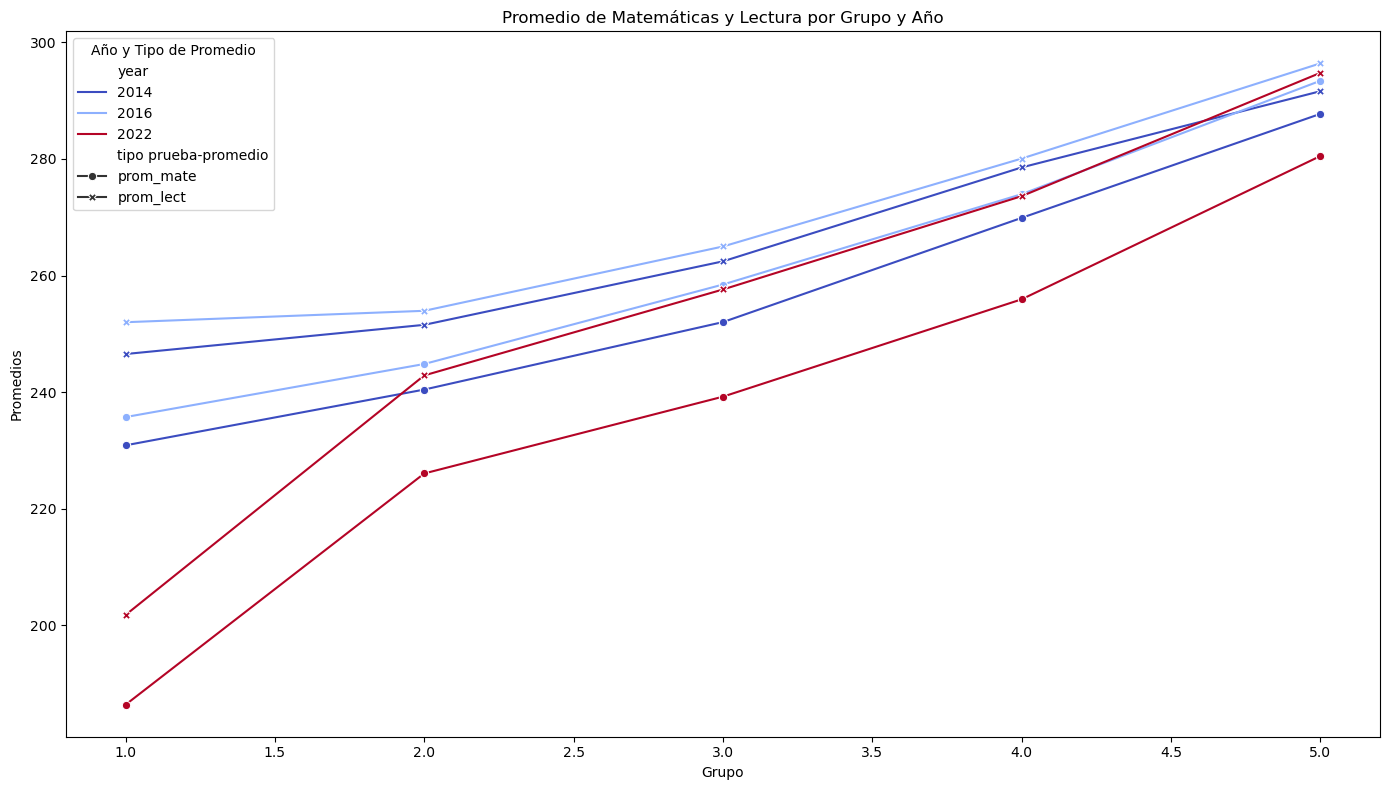

In [34]:
# se comparan distintos años y mismo curso
df_graf = pd.concat([df14_mean, df16_mean_4, df22_mean_4], ignore_index=True)

df_long = pd.melt(
    df_graf,
    id_vars=["cod_grupo", "year"],
    value_vars=["prom_mate", "prom_lect"],
    var_name="tipo prueba-promedio",
    value_name="promedio"
)

plt.figure(figsize=(14, 8))

sns.lineplot(
    data=df_long,
    x="cod_grupo",
    y="promedio",
    hue="year",
    style="tipo prueba-promedio",
    markers=True,
    dashes=False,
    palette='coolwarm'
)

plt.xlabel("Grupo")
plt.ylabel("Promedios")
plt.title("Promedio de Matemáticas y Lectura por Grupo y Año")
plt.legend(title="Año y Tipo de Promedio")

plt.tight_layout()
plt.show()

## Analisis(primer grafico)
El grafico muestra el promedio de puntaje en las pruebas de matematicas y lenguaje en distintos años y cursos en base a el nivel socioeconomico del establecimiento.
### Los resultados indican que:
1. El resultado promedio en las pruebas es mejor dependiendo del nivel socioeconomico del establecimiento.
2. En la prueba de lenguaje de 2019 se visualiza el peor rendimiento a nivel general de todos los datos analizados.
3. En la prueba de lenguaje de 2014 se presenta el mejor resultado con diferencia en la prueba para establecimientos de nivel socioeconomico tipo 1.
4. En 2022 en la prueba de matematicas se presenta el mejor resultado con diferencia para establecimientos de nivel tipo 5.

## Conclusion:
En base al analisis realizado, podemos concluir que el nivel socioeconomico influye significativamente en los resultados de la prueba SIMCE obteniendo mejores resultados los establecimiento con un nivel socioeconomico alto(5), mientras que al disminuir el nivel socioeconomico los resultados van en declive.

## Analisis(segundo grafico)
El grafico muestra el promedio de puntaje en las pruebas de matematicas y lenguaje en distintos años y mismo grado en base a el nivel socioeconomico del establecimiento.

## Los resultados indican que:
Se comparte el punto 1.
1. En la prueba de lenguaje de 2016 se presenta el mejor resultado con diferencia por nivel socioeconomico.
2. La prueba de matematicas en 2022 cuenta con los peores resultados con diferencia en los años estudiados.
3. Podemos ver que en 2014 y 2016 los resultados en las pruebas era mejor en establecimientos de nivel socieconomico 1 y decrecio en cuanto a 2022.

## Conclusion:
Podemos concluir que al analizar el mismo grado de educacion en distintos años hay una diferencia significativa en cuanto a los resultados de la prueba SIMCE dependiendo del nivel socieconomico del establecimiento, donde si es menor este nivel los resultados seran peores a los obtenidos por establecimiento con mejor nivel socioeconomico.